# Generate Step Distribution


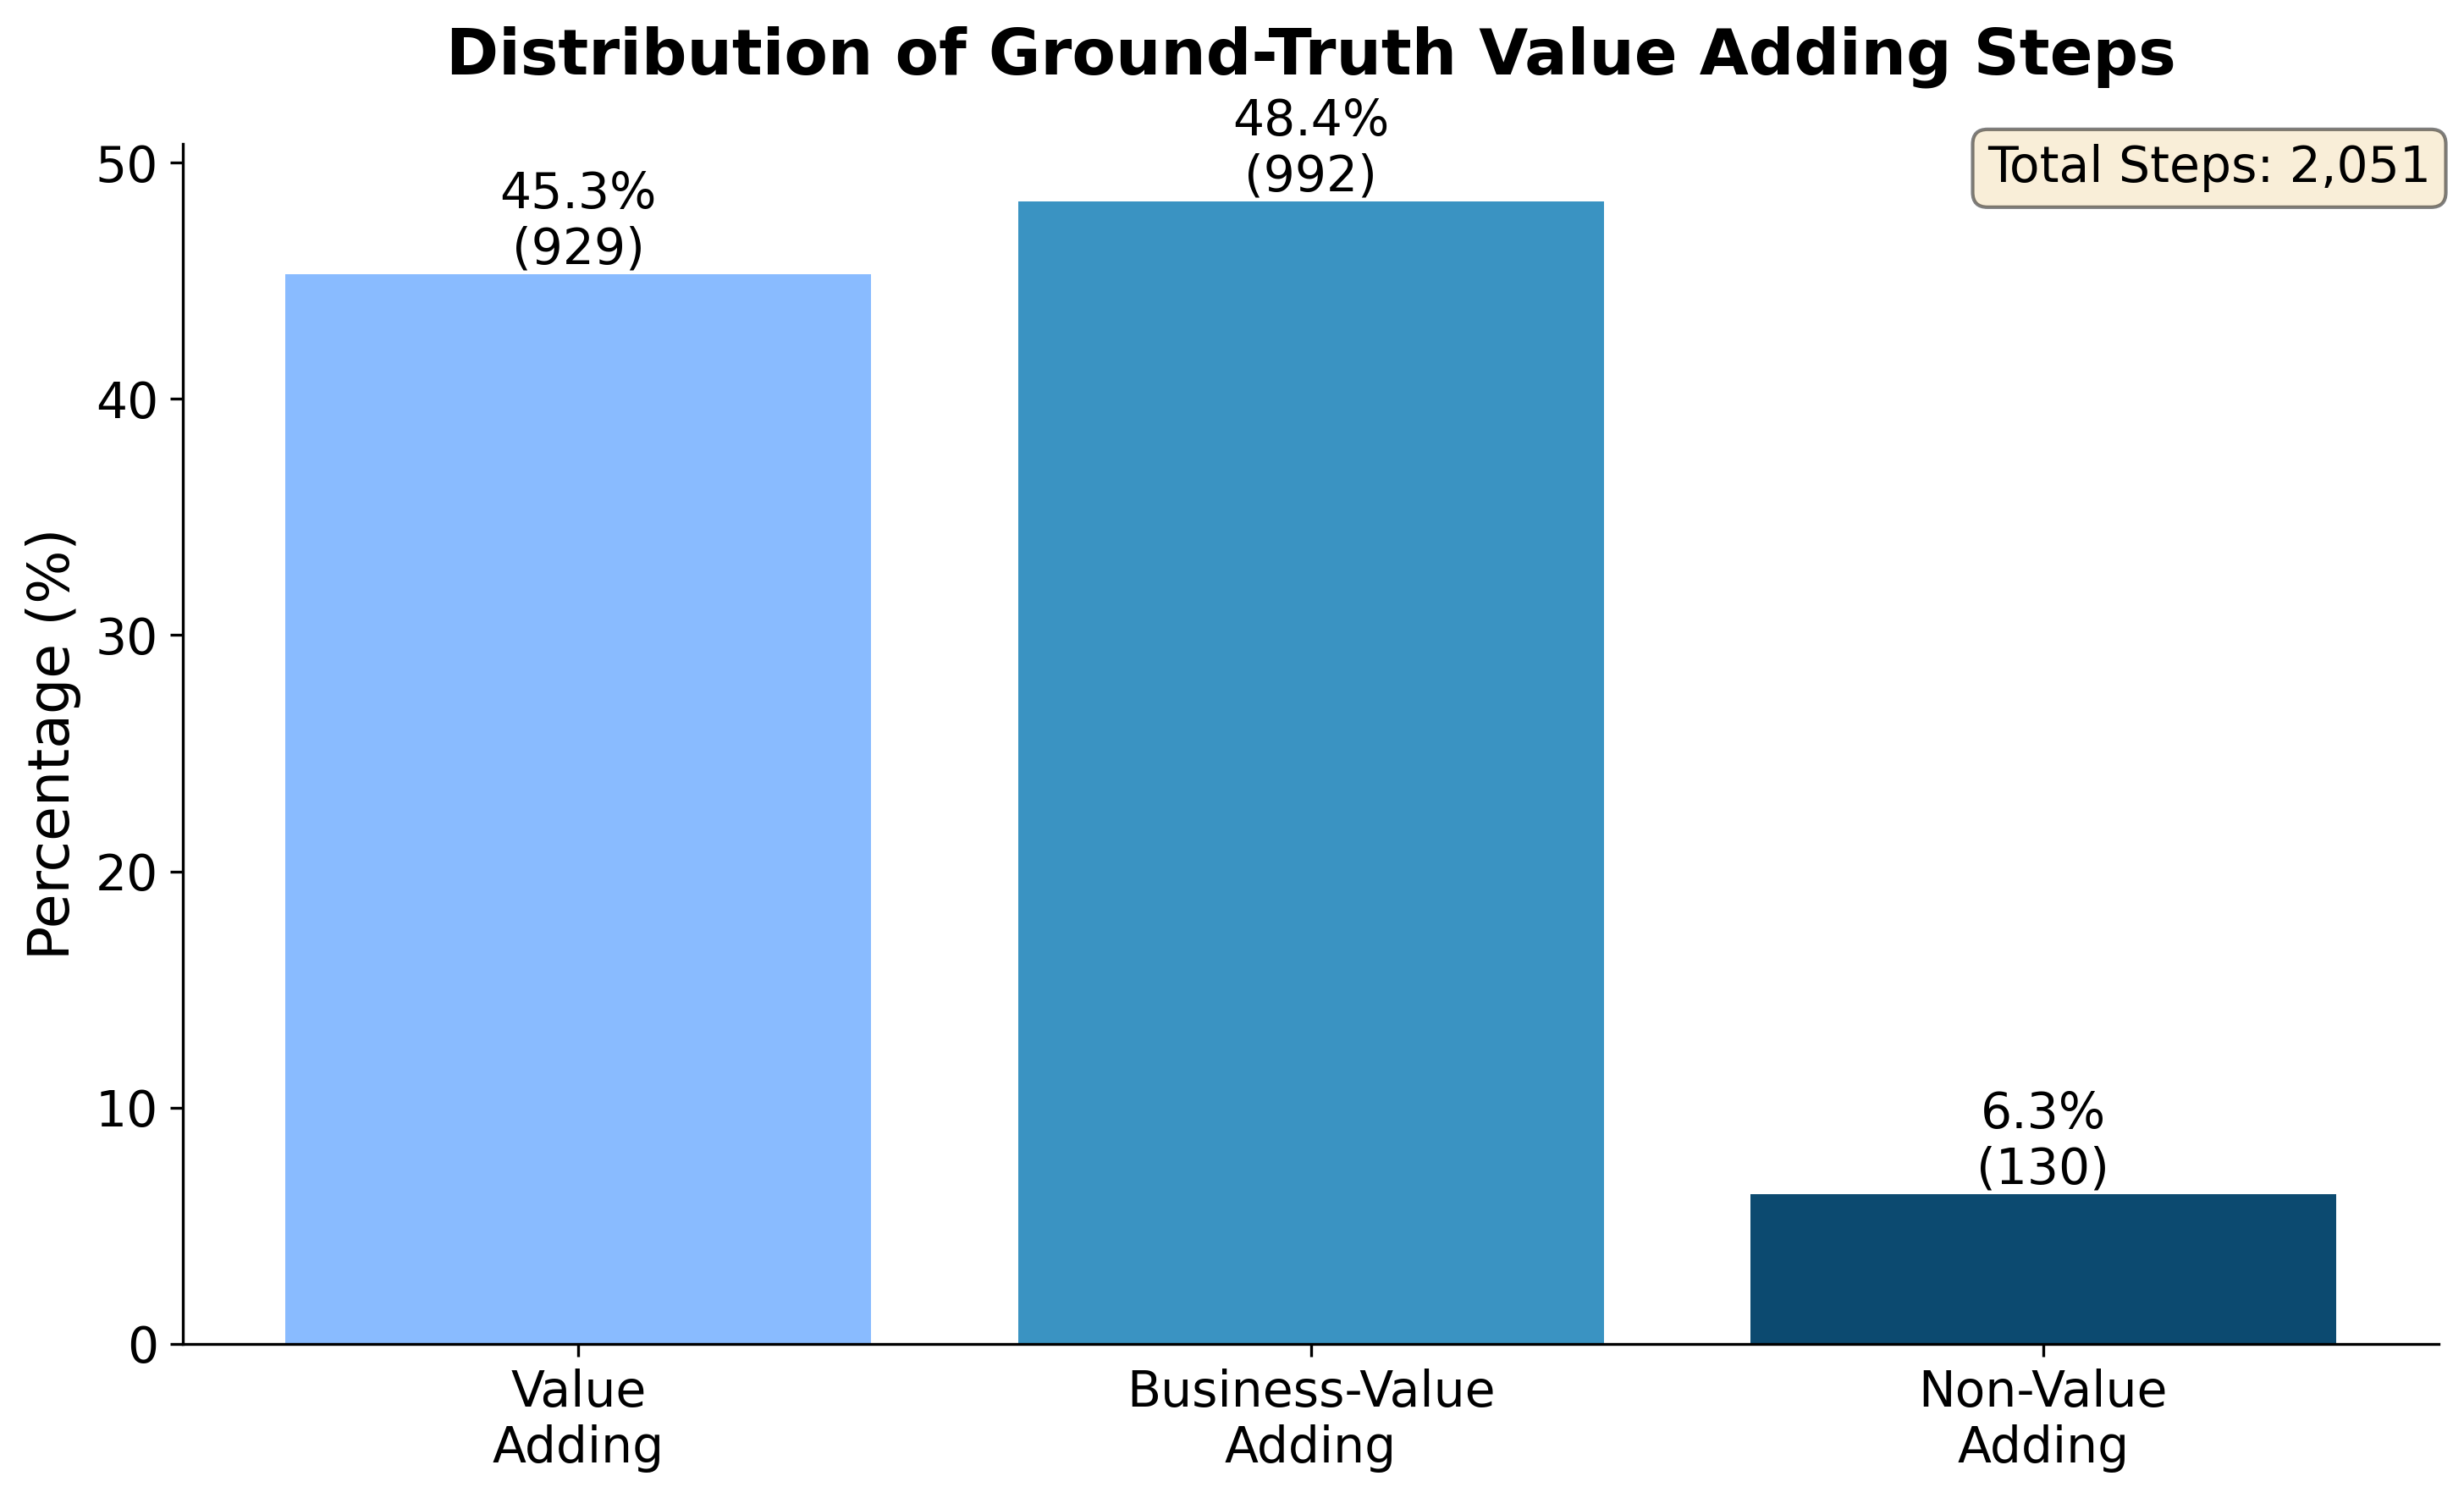

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def create_academic_value_adding_chart(va_count, bva_count, nva_count, output_file='value_adding_distribution_academic.png'):
    # Data preparation
    categories = ['Value\nAdding', 'Business-Value\nAdding', 'Non-Value\nAdding']
    counts = np.array([va_count, bva_count, nva_count])
    total = sum(counts)
    percentages = counts / total * 100

    # Calculate confidence intervals (95%)
    confidence_intervals = []
    for count in counts:
        ci = stats.t.interval(confidence=0.95, df=len(categories)-1, loc=count, scale=stats.sem([count]))
        confidence_intervals.append((ci[1] - count) / total * 100)  # Convert to percentage

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    bars = ax.bar(categories, percentages, yerr=confidence_intervals, capsize=5, 
                  color=['#89bbff', '#3a93c2', '#0c4a70'], linewidth=1.5)

    # Customize the chart
    ax.set_ylabel('Percentage (%)', fontsize=16)
    ax.set_title('Distribution of Ground-Truth Value Adding Steps', fontsize=18, fontweight='bold', pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Add value labels on the bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{percentages[i]:.1f}%\n({counts[i]:,})',
                ha='center', va='bottom', fontsize=14)#, fontweight='bold')

    # Add a text box with the total count
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.8, 1, f'Total Steps: {total:,}', transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(output_file, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

# Example usage:
# create_academic_value_adding_chart(10000, 15000, 2000)
    plt.close()

create_academic_value_adding_chart(587+342, 640+352, 86+44)

    # if set_type == 'train':
    #     n_va, n_bva, n_nva = 587, 689, 84  # Train distribution
    # else:
    #     n_va, n_bva, n_nva = 342, 352, 44  # Test distribution
    